Voltage values: [0.3105, 0.3105, 0.311, 0.3105, 0.3105, 0.3105, 0.3105, 0.311, 0.3105, 0.3105, 0.3105, 0.3086, 0.3086, 0.3086, 0.3086, 0.3086, 0.3086, 0.3086, 0.3086, 0.3086, 0.3047, 0.3047, 0.3047, 0.3047, 0.3047, 0.3047, 0.3086, 0.3047, 0.3086, 0.3086, 0.3047, 0.3086, 0.3086, 0.3086, 0.3086, 0.3086, 0.3086, 0.3086, 0.3105, 0.3359, 0.3359, 0.3359, 0.3359, 0.3359, 0.3398, 0.3398, 0.3359, 0.3359, 0.3359, 0.311, 0.3105, 0.3086, 0.3086, 0.3086, 0.3086, 0.3086, 0.3086, 0.3086, 0.3086, 0.3086, 0.3105, 0.311, 0.3359, 0.3359, 0.3359, 0.3359, 0.3398, 0.3516, 0.3555, 0.3672, 0.3711, 0.4297, 0.4336, 0.4336, 0.4336, 0.4336, 0.4297, 0.4297, 0.4336, 0.4609, 0.4922, 0.4961, 0.4961, 0.5273, 0.498, 0.4922, 0.4922, 0.4961, 0.4961, 0.5586, 0.5586, 0.5898, 0.6211, 0.6211, 0.6235, 0.6235, 0.6211, 0.623, 0.6211, 0.6797, 0.6211, 0.6836, 0.6836, 0.6836, 0.6836, 0.6797, 0.6797, 0.6523, 0.6235, 0.6836, 0.6836, 0.7148, 0.7422, 0.7148, 0.7148, 0.6836, 0.6523, 0.6211, 0.5898, 0.6211, 0.6211, 0.6523, 0.6235, 0.621

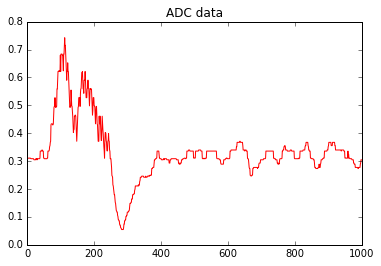

In [25]:
%matplotlib inline
from pynq.pmods import PMOD_ADC
import time
import matplotlib.pyplot as plt

# initialize ADC on PMOD 1 (JB).
# The ADC DA4 has 4 input channels at 12 bit resolution, however only the first 3: 
# V1, V2 and V3 (form 0 to 2) can be used.
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE
pmod_adc = PMOD_ADC(1)

# read the tension value for V1 (V1 -> 0) and print it
#value = pmod_adc.read(0)
#print("Current voltage: " + str(value) + "V")

# start logging on V3 (V3 -> 2) with log interval of 1 ms
# NOTE: the current driver allows to log only one input at a time,
# to get data from multiple inputs at the same time you need to get them manually within a loop
#2 è IL CANALE DI LETTURA , 10 INTERVALLO TRA OGNI CAMPIONE(ms)
pmod_adc.start_log(2, 1)

# TEMPO DI ACQUISIZIONE

time.sleep(3)

# get and stop logging
values = pmod_adc.get_log()
print("Voltage values: " + str(values))

# draw graph
plt.plot(range(len(values)), values, 'r')
plt.title('ADC data')
plt.show()

In [26]:
import numpy as np
np.savetxt("Suono4.npy",values)

999


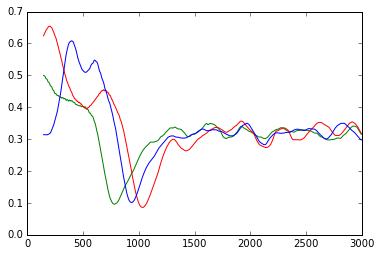

In [27]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
segnale4=np.loadtxt("Suono4.npy")
segnale=np.loadtxt("Suono3.npy")
template=np.loadtxt("Suono2.npy")
print(len(segnale))

mediasegnale2=pd.rolling_mean(template,50)
mediasegnale3=pd.rolling_mean(segnale,50)
mediasegnale4=pd.rolling_mean(segnale4,50)

t=np.arange(0,len(segnale)*3,3)
plt.plot(t,mediasegnale2,color='g')
plt.plot(t,mediasegnale3,color='r')
plt.plot(t,mediasegnale4,color='b')
plt.show()
    

In [4]:
segnale=np.loadtxt("Suono.npy")

segnaleP=segnale-mediasegnale

t=np.arange(0,len(segnale)*3,3)
plt.figure(figsize=(10,10))
plt.plot(t,segnaleP,color='g')
plt.show()
    

In [28]:
media=np.mean(mediasegnale2,mediasegnale3,mediasegnale4)
plt.plot(t,media)
plt.show()

TypeError: only integer arrays with one element can be converted to an index